# TWITTER DATA AND SENTIMENT ANALYSIS

Using Twitter API to download tweets for data analysis. To have access, I made an application to Twitter as a developer
to get access to tokens or access codes, which serves as a unique identifier. Large parts of the code was sourced online
and the remaining parts where learnt codes from laboratory and courseworks.

# SECTION A

This section shows the steps taken to download tweets and store them in a dataframe for analsyis.

In [224]:
#importing modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from matplotlib import rcParams
import seaborn as sns

In [3]:
#importing modules
import tweepy
from tweepy import OAuthHandler
import json

In [4]:
#importing modules
import sys
import urllib
import simplejson
import sqlite3

In [5]:
#importing modules
import time
import datetime
from pprint import pprint
from sqlalchemy.sql import join
from types import *
from datetime import datetime, date, time
from sqlalchemy import DECIMAL
from sqlalchemy import Unicode

In [6]:
#importing modules
import sqlalchemy
from sqlalchemy.orm import mapper, sessionmaker
from sqlalchemy import Column, Integer, String, ForeignKey, Text, DateTime, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Unicode #
from sqlalchemy import Text #

source code credit: http://social-metrics.org/downloading-tweets-with-a-specific-hashtag/

In [ ]:
#Assigning tokens to variable names and instantiating the objects
consumer_key = 'WdagTkoOMp5KTzyr4QjRyahnR'
consumer_secret = 'xdeokP6SVnjQtHRAiacbq5sHYpzaeIfSb9oB7sBfcjQEbcgBzu'
access_token = '595352929-BPmjSfst545vv3jjM6FEcEh2oqfEDaMJZWh6XBmf'
access_secret = 'hHTNg1ORCKPwKdEP0Ng3h3g16ORz45Oug4Aw9rLZKBLas'
#tweepy uses OAuthHandler to authenticate the tokens given as stated above 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
#tweepy.API() provides a wrapper for the API so that it can be use defined functions for tweet downloads
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [14]:
#importing modules
from tweepy import Stream
from tweepy.streaming import StreamListener

In [17]:
#importing modules
from tweepy import Cursor
import time
import pandas as pd

In [18]:
#setting maximum tweets to download per session time
MAX_TWEETS = 100000

In [95]:
#The cursor construct helps in pagination int Twitter API. It does all the hard work behind the scenes. The cursor
#iterates through timelines, user lists, and direct messages. The search criteria here is London and/or West End, and
#also removing retweets as it will inflate the number of tweets 
data = Cursor(api.search,q= "london OR #westend -RT").items(MAX_TWEETS)

Twitter has download rate limit set for each developer, so developers can only download streams of tweets for a
particular time in a day. This limit is set for tweets sent within couple of hours. Once the limit is reached, the 
automatically shuts down (sleeps if set as such), and then after some minutes, the developer can make another call. I have to interrupt the kernel (shown below as keyboard interrupt) in order to print output of tweets downloaded. 

In [91]:
#creating the first list to store downloaded tweets in json format
west_end_first = []
#looping through downloaded tweets and converting it to a json format as a stored text
current_working_dir = "./"
log_tweets = current_working_dir  + str(time.time()) + '_westend_tweets.txt'
with open(log_tweets, 'w') as outfile:
    for tweet in data:
        west_end_first.append(json.loads(json.dumps(tweet._json)))
        outfile.write(json.dumps(tweet._json))
        outfile.write("\n")

Rate limit reached. Sleeping for: 811


KeyboardInterrupt: 

In [96]:
#creating the second list to store downloaded tweets in json format
west_end_second = []
#looping through downloaded tweets and converting it to a json format as a stored text    
current_working_dir = "./"
log_tweets = current_working_dir  + str(time.time()) + '_westend_tweets.txt'
with open(log_tweets, 'w') as outfile:
    for tweet in data:
        west_end_second.append(json.loads(json.dumps(tweet._json)))
        outfile.write(json.dumps(tweet._json))
        outfile.write("\n")

Rate limit reached. Sleeping for: 829


TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)

In [92]:
#printing the length of first downloaded tweets
len(west_end_first)

2638

In [97]:
#printing the length of second downloaded tweets
len(west_end_second)

2651

source code credit: http://adilmoujahid.com/posts/2014/07/twitter-analytics/

Since the tweets are stored in json format, we can call the keys to extract the values to use for our purposes. I 
created a dataframe using Pandas to contain date of tweet, user, text, language tweet sent in, location of tweet, retweets and 
coordinates. Because I have two separate json files from two batches of download done, I created two dataframes and 
joined them as a single dataframe.

In [93]:
# creating first dataframe
tweets1 = pd.DataFrame()
# We want to know when a tweet was sent
tweets1['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), west_end_first)
# Who is the tweet owner
tweets1['user'] = map(lambda tweet: tweet['user']['screen_name'], west_end_first)
# How many follower this user has
#tweets['user_followers_count'] = map(lambda tweet: tweet['user']['followers_count'], west_end)
# What is the tweet's content
tweets1['text'] = map(lambda tweet: tweet['text'].encode('utf-8'), west_end_first)
# If available what is the language the tweet is written in
tweets1['lang'] = map(lambda tweet: tweet['lang'], west_end_first)
# If available, where was the tweet sent from ?
tweets1['Location'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, west_end_first)
# How many times this tweet was retweeted and favorited
tweets1['retweet_count'] = map(lambda tweet: tweet['retweet_count'], west_end_first)
#tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], west_end)
tweets1['coordinates'] = map(lambda tweet: tweet['coordinates'], west_end_first)

In [98]:
# creating second dataframe
tweets2 = pd.DataFrame()
# We want to know when a tweet was sent
tweets2['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), west_end_second)
# Who is the tweet owner
tweets2['user'] = map(lambda tweet: tweet['user']['screen_name'], west_end_second)
# How many follower this user has
#tweets['user_followers_count'] = map(lambda tweet: tweet['user']['followers_count'], west_end)
# What is the tweet's content
tweets2['text'] = map(lambda tweet: tweet['text'].encode('utf-8'), west_end_second)
# If available what is the language the tweet is written in
tweets2['lang'] = map(lambda tweet: tweet['lang'], west_end_second)
# If available, where was the tweet sent from ?
tweets2['Location'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, west_end_second)
# How many times this tweet was retweeted and favorited
tweets2['retweet_count'] = map(lambda tweet: tweet['retweet_count'], west_end_second)
#tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], west_end)
tweets2['coordinates'] = map(lambda tweet: tweet['coordinates'], west_end_second)

In [103]:
#checking the contents of the dataframe
tweets1.head(1)

,created_at,user,text,lang,Location,retweet_count,coordinates
0,2017-08-17 19:08:44,pjj5nqWrdajjbuc,#girl #london exotic #nudes #sex naked #amateu...,en,None,0,None


In [104]:
#checking the contents of the dataframe 
tweets2.head(1)

,created_at,user,text,lang,Location,retweet_count,coordinates
0,2017-08-17 20:32:35,Niki_London,I need this set https://t.co/7M1yowQfzz,en,Antigua and Barbuda,0,None


In [100]:
#merging the two dataframes
merged_tweets = pd.concat([tweets1,tweets2], axis=0)

In [105]:
#printing results to check its contents
merged_tweets.head()

,created_at,user,text,lang,Location,retweet_count,coordinates
0,2017-08-17 19:08:44,pjj5nqWrdajjbuc,#girl #london exotic #nudes #sex naked #amateu...,en,None,0,None
1,2017-08-17 19:08:42,Hockeyfrilla,@MsMorganWalsh Not sure if you're still in Lon...,en,None,0,None
2,2017-08-17 19:08:42,skipisky,Whats 5 hours London time? 8:08 PM WVAT ISHV G...,en,None,0,None
3,2017-08-17 19:08:40,ni_voice,@PaulTyredagh81 Currently going to Tulsi in Ho...,en,None,0,None
4,2017-08-17 19:08:39,AdrianJohnSroka,No Go Zones: 'No Whites Allowed After 8 PM' Gr...,en,None,0,None


In [102]:
#Because this is a streamed data, it is important to save downloaded tweets to use for future analysis.
#Saving the dataframe as a csv file for future use and analysis.
save_tweets = merged_tweets.to_csv('/Users/jamessolomon/Desktop/merged_tweets.csv', sep=',', encoding='utf-8')

# SECTION B

This section deals with analysing the contents of the tweets stored in a dataframe.

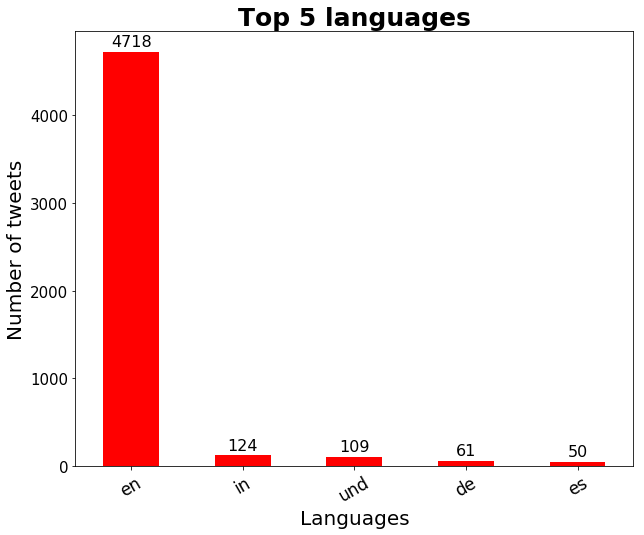

In [106]:
#counting all languages tweets were sent in
tweets_by_lang = merged_tweets['lang'].value_counts()
#plotting the counted languages 
fig, ax = plt.subplots(figsize=(10,8))
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Languages', fontsize=20)
ax.set_ylabel('Number of tweets' , fontsize=20)
ax.set_title('Top 5 languages', fontsize=25, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red', rot=30)
#assigning the number of tweets for each language on top of bar for each language
for lng in ax.patches:
    ax.annotate("%.f" % lng.get_height(), (lng.get_x() + lng.get_width() / 2., lng.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=16)
#saving plot
plt.savefig('/Users/jamessolomon/Desktop/plots/top5_tweets.png')

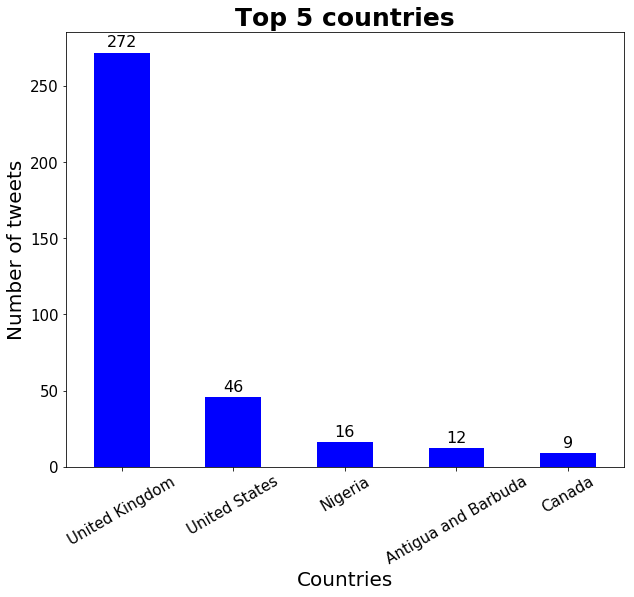

In [107]:
#counting the number of tweets sent from a country 
tweets_by_country = merged_tweets['Location'].value_counts()
#plotting the total count of tweets by country
fig, ax = plt.subplots(figsize=(10,8))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Countries', fontsize=20)
ax.set_ylabel('Number of tweets' , fontsize=20)
ax.set_title('Top 5 countries', fontsize=25, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue',rot=30)
#assigning the number of tweets for each country on top of bar for each country
for twt in ax.patches:
    ax.annotate("%.f" % twt.get_height(), (twt.get_x() + twt.get_width() / 2., twt.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=16)
#saving plot
plt.savefig('/Users/jamessolomon/Desktop/plots/top5_countries.png')

In [108]:
#This function return True if a word is found in text, otherwise it returns False.
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [109]:
#creating new columns to contain a boolean if they exist in the tweets dataframe
merged_tweets['West End'] = merged_tweets['text'].apply(lambda tweet: word_in_text('west end', tweet))
merged_tweets['London'] = merged_tweets['text'].apply(lambda tweet: word_in_text('london', tweet))
merged_tweets['Westminster'] = merged_tweets['text'].apply(lambda tweet: word_in_text('westminster', tweet))

In [113]:
#calculate the number of tweets for each area
print merged_tweets['West End'].value_counts()[True]
print merged_tweets['London'].value_counts()[True]
print merged_tweets['Westminster'].value_counts()[True]

2
4285
26


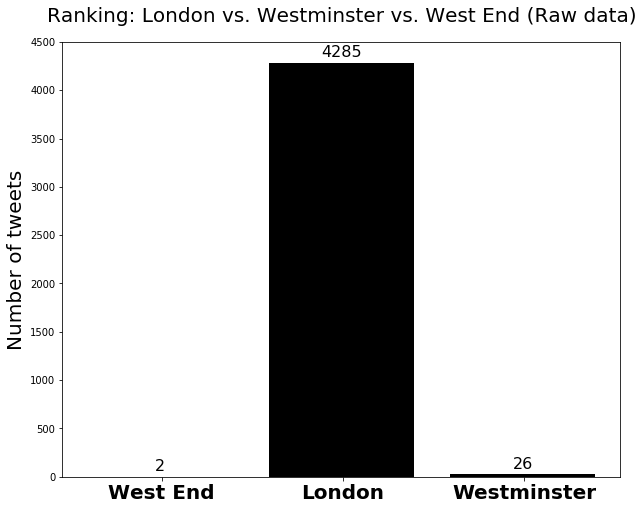

In [120]:
#making a comparison chart for each location retrieved
areas = ['West End', 'London', 'Westminster']
tweets_by_area = [merged_tweets['West End'].value_counts()[True], merged_tweets['London'].value_counts()[True], merged_tweets['Westminster'].value_counts()[True]]

x_pos = list(range(len(areas)))
width = 0.8
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x_pos, tweets_by_area, width, alpha=1, color='black')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=20)
ax.set_title('Ranking: London vs. Westminster vs. West End (Raw data)', fontsize=20)
rcParams['axes.titlepad'] = 25 
ax.set_xticks([p + 0.01 * width for p in x_pos])
ax.set_xticklabels(areas,fontsize=20,fontweight='bold')
plt.grid('off')
#assigning numbers on top of bar for each location retrieved
for rnk in ax.patches:
    ax.annotate("%.f" % rnk.get_height(), (rnk.get_x() + rnk.get_width() / 2., rnk.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=16)
#saving plot
plt.savefig('/Users/jamessolomon/Desktop/plots/area_ranking.png')

I wanted to know if some keywords were present in the downloaded tweets, so I created new columns to contain a boolean
for each keyword present or not present

In [133]:
#creating dataframe to contain text in tweets
merged_tweets['Train'] = merged_tweets['text'].apply(lambda tweet: word_in_text('train', tweet))
merged_tweets['Club'] = merged_tweets['text'].apply(lambda tweet: word_in_text('club', tweet))
merged_tweets['Noise'] = merged_tweets['text'].apply(lambda tweet: word_in_text('noise', tweet))
merged_tweets['Food'] = merged_tweets['text'].apply(lambda tweet: word_in_text('food', tweet))
merged_tweets['Drink'] = merged_tweets['text'].apply(lambda tweet: word_in_text('drink', tweet))

In [135]:
#creating relevant tweets. This shows whether the keword is in the tweets or not
merged_tweets['Relevant'] = merged_tweets['text'].apply(lambda tweet: word_in_text('train', tweet) or 
                                          word_in_text('club', tweet) or 
                                         word_in_text('noise', tweet) or
                                         word_in_text('food', tweet) or 
                                         word_in_text('drink', tweet)) 

In [136]:
#printing total tweets for each keyword searched
print merged_tweets['Train'].value_counts()[True] 
print merged_tweets['Club'].value_counts()[True]
print merged_tweets['Noise'].value_counts()[True]
print merged_tweets['Food'].value_counts()[True]
print merged_tweets['Drink'].value_counts()[True]
print merged_tweets['Relevant'].value_counts()[True]

50
43
1
36
14
141


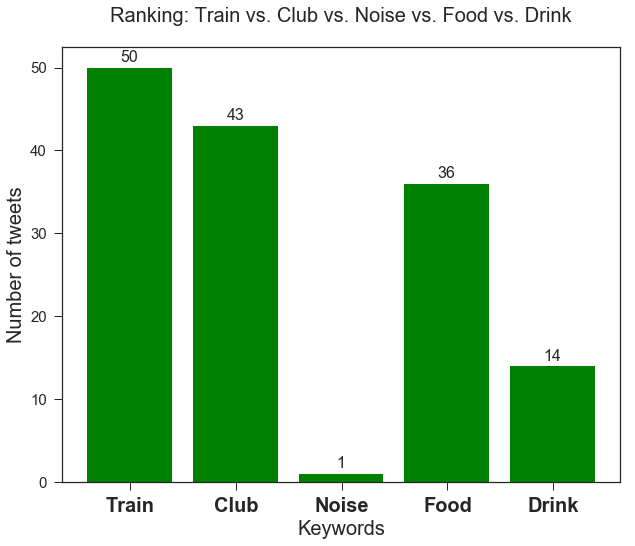

In [230]:
#plotting tweets of most mentioned word in text
areas2 = ['Train','Club','Noise','Food','Drink']
tweets_interest = [merged_tweets[merged_tweets['Relevant'] == True]['Train'].value_counts()[True], 
                      merged_tweets[merged_tweets['Relevant'] == True]['Club'].value_counts()[True], 
                      merged_tweets[merged_tweets['Relevant'] == True]['Noise'].value_counts()[True],
                  merged_tweets[merged_tweets['Relevant'] == True]['Food'].value_counts()[True],
                  merged_tweets[merged_tweets['Relevant'] == True]['Drink'].value_counts()[True]]
x_pos = list(range(len(areas2)))
width = 0.8
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x_pos, tweets_interest, width,alpha=1,color='g')
ax.set_xlabel('Keywords', fontsize=20)
ax.set_ylabel('Number of tweets', fontsize=20)
ax.set_title('Ranking: Train vs. Club vs. Noise vs. Food vs. Drink', fontsize = 20)
rcParams['axes.titlepad'] = 25 
ax.set_xticks([p + 0.01 * width for p in x_pos])
ax.set_xticklabels(areas2,fontsize=20, fontweight='bold')
plt.grid('off')
#assigning numbers on top of bar for each keyword retrieved
for rnk in ax.patches:
    ax.annotate("%.f" % rnk.get_height(), (rnk.get_x() + rnk.get_width() / 2., rnk.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=16)
#saving plot
plt.savefig('/Users/jamessolomon/Desktop/plots/relevant.png')

# SECTION C

SENTIMENT ANALYSIS:

    This explains the sentiments of users of services or the general things that people want to talk about. They express their mode by stating it emphatically or using emoticons. Such an information will be helpful to know how people feel about a particular item or topic. The steps below uses scores to identify sentiments of people for analysis.




source code credit: http://t-redactyl.io/blog/2017/04/applying-sentiment-analysis-with-vader-and-the-twitter-api.html

In [ ]:
#creating the first lists to store sentiment scores
twt1 = []
number_favourites1 = []
vs_compound1 = []
vs_pos1 = []
vs_neu1 = []
vs_neg1 = []

In [165]:
#creating the second lists to store sentiment scores
twt2 = []
number_favourites2 = []
vs_compound2 = []
vs_pos2 = []
vs_neu2 = []
vs_neg2 = []

In [156]:
#importing sentiment module in python
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [163]:
#instantiating object
analyzer = SentimentIntensityAnalyzer()
#looping through first tweets downloaded and appending scores to the lists created
for i in range(0, len(west_end_first)):
    twt1.append(west_end_first[i]['text'])
    number_favourites1.append(west_end_first[i]['favorite_count'])
    vs_compound1.append(analyzer.polarity_scores(west_end_first[i]['text'])['compound'])
    vs_pos1.append(analyzer.polarity_scores(west_end_first[i]['text'])['pos'])
    vs_neu1.append(analyzer.polarity_scores(west_end_first[i]['text'])['neu'])
    vs_neg1.append(analyzer.polarity_scores(west_end_first[i]['text'])['neg'])

In [166]:
#instantiating object
analyzer = SentimentIntensityAnalyzer()
#looping through the second tweets downloaded and appending scores to the lists created
for i in range(0, len(west_end_second)):
    twt2.append(west_end_second[i]['text'])
    number_favourites2.append(west_end_second[i]['favorite_count'])
    vs_compound2.append(analyzer.polarity_scores(west_end_second[i]['text'])['compound'])
    vs_pos2.append(analyzer.polarity_scores(west_end_second[i]['text'])['pos'])
    vs_neu2.append(analyzer.polarity_scores(west_end_second[i]['text'])['neu'])
    vs_neg2.append(analyzer.polarity_scores(west_end_second[i]['text'])['neg'])

In [164]:
#creating the first dataframe for the score generated using the sentiment module on the downloaded tweet
twitter_df1 = pd.DataFrame({'Tweet': twt1,
                        'Favourites': number_favourites1,
                        'Compound': vs_compound1,
                        'Positive': vs_pos1,
                        'Neutral': vs_neu1,
                        'Negative': vs_neg1})
twitter_df1 = twitter_df1[['Tweet', 'Favourites', 'Compound',
                         'Positive', 'Neutral', 'Negative']]

# Have a look at the top 5 results.
twitter_df1.head(5)

,Tweet,Favourites,Compound,Positive,Neutral,Negative
0,#girl #london exotic #nudes #sex naked #amateu...,0,0.0000,0.000,1.000,0.000
1,@MsMorganWalsh Not sure if you're still in Lon...,0,0.8834,0.377,0.623,0.000
2,Whats 5 hours London time? 8:08 PM WVAT ISHV G...,0,0.0000,0.000,1.000,0.000
3,@PaulTyredagh81 Currently going to Tulsi in Ho...,0,0.4927,0.176,0.824,0.000
4,No Go Zones: 'No Whites Allowed After 8 PM' Gr...,0,-0.5267,0.000,0.732,0.268


In [167]:
#creating the second dataframe for the score generated using the sentiment module on the downloaded tweet
twitter_df2 = pd.DataFrame({'Tweet': twt2,
                        'Favourites': number_favourites2,
                        'Compound': vs_compound2,
                        'Positive': vs_pos2,
                        'Neutral': vs_neu2,
                        'Negative': vs_neg2})
twitter_df2 = twitter_df2[['Tweet', 'Favourites', 'Compound',
                         'Positive', 'Neutral', 'Negative']]

# Have a look at the top 5 results.
twitter_df2.head(5)

,Tweet,Favourites,Compound,Positive,Neutral,Negative
0,I need this set https://t.co/7M1yowQfzz,0,0.0000,0.000,1.000,0.000
1,@tjmartn88 @metpoliceuk Because London has no ...,0,-0.7783,0.000,0.570,0.430
2,The 22:10 London Bridge to West Croydon has be...,0,-0.2263,0.000,0.881,0.119
3,"Platform Engineering Lead - City of London, L...",0,0.0000,0.000,1.000,0.000
4,@qweety_ Its a funny story to tell on another ...,0,0.9001,0.423,0.577,0.000


In [171]:
#joining the two dataframes
join_sent_twts = pd.concat([twitter_df1,twitter_df2])

In [172]:
#printing the results to check its contents
join_sent_twts.head()

,Tweet,Favourites,Compound,Positive,Neutral,Negative
0,#girl #london exotic #nudes #sex naked #amateu...,0,0.0000,0.000,1.000,0.000
1,@MsMorganWalsh Not sure if you're still in Lon...,0,0.8834,0.377,0.623,0.000
2,Whats 5 hours London time? 8:08 PM WVAT ISHV G...,0,0.0000,0.000,1.000,0.000
3,@PaulTyredagh81 Currently going to Tulsi in Ho...,0,0.4927,0.176,0.824,0.000
4,No Go Zones: 'No Whites Allowed After 8 PM' Gr...,0,-0.5267,0.000,0.732,0.268


In [215]:
#categorising tweets into keywords that users talk about most 
join_sent_twts['Keywords'] = np.where(join_sent_twts['Tweet'].str.contains('(?:^|\W)(Train|Club|Noise|Food|Drink)(?:$|\W)',
    flags = re.IGNORECASE), 1, 0)

# printing results
join_sent_twts[join_sent_twts['Keywords'] == 1].head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


,Tweet,Favourites,Compound,Positive,Neutral,Negative,Keywords
65,@Sarah_Hyland Let me know when you're in Londo...,0,0.0000,0.000,1.000,0.000,1
133,"Weekend gigs....\n\nFRI - London, Egg club\nSA...",3,-0.6597,0.000,0.812,0.188,1
190,Solo on the train to London! https://t.co/X3CV...,0,0.0000,0.000,1.000,0.000,1
193,New to London or Bristol or just visiting and ...,0,0.4588,0.154,0.846,0.000,1
370,RTWorkday: ICYMI: Our London team won our annu...,0,0.7644,0.292,0.708,0.000,1


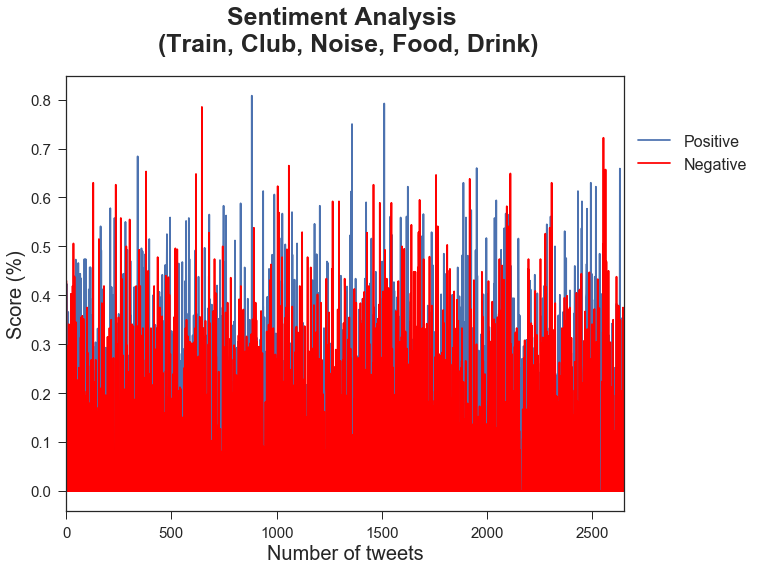

In [232]:
#plotting sentiment scores 
sns.set(font_scale=1.5)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
fig,ax=plt.subplots(figsize=(10,8))
join_sent_twts['Positive'].plot(legend=True,ax=ax)
join_sent_twts['Negative'].plot(legend=True,ax=ax,c='r')
ax.set_title('Sentiment Analysis \n (Train, Club, Noise, Food, Drink)', fontsize=25, fontweight='bold')
ax.set_xlabel('Number of tweets',fontsize=20)
ax.set_ylabel('Score (%)', fontsize=20)
plt.legend(loc='best',bbox_to_anchor=(1, 0.9),fontsize=16)
plt.grid('off')
#saving plot
plt.savefig('/Users/jamessolomon/Desktop/plots/sentiment.png',bbox_inches="tight")